In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
%matplotlib inline
import os

In [28]:
import openpyxl
import xlrd
from functools import reduce

In [29]:
#file = (r'c:/Users/pjant/Drew/DATA 503/Dataset For Final Project.xlsm')
file = (r'c:/Users/pjant/Drew/DATA 601/datasets/final project/Dataset For Final Project.xlsm')
sheet_name = ('Data Table Training')

# Create the Initial Dataframe

In [30]:
df_swapIV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','IV'), usecols=(1,2))
df_swapRates = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Rates'), usecols=(4,5) )
df_swapHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'HV'), usecols=(4,6))
df_VIX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date', 'VIX'), usecols=(8,9))
df_curve = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Curve'), usecols=(11,12))
df_SPX = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPX'), usecols=(14,15))
df_SPXHV = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','SPXHV'), usecols=(14,16))
df_CDXHY = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','CDXHY'),usecols=(18,19))
df_Spreads = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','Spreads'),usecols=(21,22))
df_HYG = pd.read_excel(file, sheet_name=sheet_name, header=1, names=('Date','HYG'),usecols=(25,26))

In [61]:
data_frames = [df_swapIV, df_swapRates, df_swapHV, df_VIX, df_curve, df_SPX, df_SPXHV, df_Spreads, df_HYG]

In [62]:
df_merged = reduce(lambda  left,right:pd.merge(left,right,on=['Date'],how='inner'),data_frames)

In [63]:
df_merged.head()

,Date,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
0,2020-04-22,77.0400,0.6630,0.524,41.98,0.2590,2799.31,46.633913,4.30,79.10
1,2020-04-21,77.2550,0.6378,0.414,45.41,0.2282,2736.56,41.183960,6.88,78.41
2,2020-04-20,75.1000,0.6723,0.991,43.83,0.2507,2823.16,36.512222,6.50,79.87
3,2020-04-17,78.5064,0.7128,1.001,38.15,0.2967,2874.56,38.769620,7.00,81.09
4,2020-04-16,78.5025,0.7027,1.105,40.11,0.2775,2799.55,36.496217,7.44,80.68


Make the Date column the Index

In [64]:
df_merged['Date'] = pd.to_datetime(df_merged['Date'], dayfirst = True)
df_merged.set_index('Date', inplace=True)
#df_merged=df_merged.asfreq('b')
df_merged=df_merged.fillna(method='ffill')

In [65]:
#df_merged['Date'] = pd.to_datetime(df_merged['Date'], dayfirst=True)

In [66]:
#df_merged.set_index('Date', inplace=True)

"Normalize" the Implied Volatilities (IV's) by dividing them by their respective Rates

In [67]:
#normalize implied vols and scale up the historical vols
df_merged['IV'] = df_merged['IV']/df_merged['Rates']

df_merged['HV'] = df_merged['HV']*100

# Review the Data Set

In [68]:
df_merged.head()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2020-04-22,116.199095,0.6630,52.4,41.98,0.2590,2799.31,46.633913,4.30,79.10
2020-04-21,121.127313,0.6378,41.4,45.41,0.2282,2736.56,41.183960,6.88,78.41
2020-04-20,111.706084,0.6723,99.1,43.83,0.2507,2823.16,36.512222,6.50,79.87
2020-04-17,110.138047,0.7128,100.1,38.15,0.2967,2874.56,38.769620,7.00,81.09
2020-04-16,111.715526,0.7027,110.5,40.11,0.2775,2799.55,36.496217,7.44,80.68


In [69]:
df_merged.tail()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,,
2007-09-25,18.819747,5.2870,202.325058,18.60,0.5995,1452.85,6.948365,65.80,104.70
2007-09-24,18.625319,5.2885,199.016959,19.37,0.5900,1447.80,7.175853,65.31,104.45
2007-09-21,18.279366,5.2655,216.014853,19.00,0.5990,1438.87,6.817902,64.30,103.75
2007-09-20,17.743140,5.3570,180.174626,20.45,0.6085,1448.39,7.389371,64.75,103.49
2007-09-19,17.419167,5.1495,74.677864,20.03,0.5445,1444.61,8.416627,60.73,106.09


In [70]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3143 entries, 2020-04-22 to 2007-09-19
Data columns (total 9 columns):
IV         3143 non-null float64
Rates      3143 non-null float64
HV         3143 non-null float64
VIX        3143 non-null float64
Curve      3143 non-null float64
SPX        3143 non-null float64
SPXHV      3143 non-null float64
Spreads    3143 non-null float64
HYG        3143 non-null float64
dtypes: float64(9)
memory usage: 245.5 KB


In [71]:
df_merged.describe()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,36.152964,2.684582,84.170931,19.800487,1.304900,1826.250318,16.046982,11.070022,88.015384
std,14.540367,0.879847,54.748534,9.950743,0.816235,641.548244,14.944491,20.268937,6.070915
min,15.235405,0.622600,5.072393,9.140000,-0.132500,676.530000,0.806088,-18.000000,61.640000
25%,27.097458,2.067400,47.964884,13.535000,0.598800,1308.605000,7.259082,-1.625000,85.710000
50%,34.555394,2.538500,71.300191,16.810000,1.329000,1733.150000,11.862491,8.310000,88.030000
75%,42.440534,3.121050,103.509650,22.445000,2.004400,2271.515000,19.809094,14.750000,91.840000
max,213.186637,5.357000,546.448774,82.690000,2.806600,3386.150000,176.484818,91.290000,106.090000


In [72]:
df_merged.isna().sum()

IV         0
Rates      0
HV         0
VIX        0
Curve      0
SPX        0
SPXHV      0
Spreads    0
HYG        0
dtype: int64

In [73]:
df_merged.corr()

,IV,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
IV,1.000000,-0.450195,0.318003,0.547639,-0.034320,-0.129893,0.482607,-0.139194,-0.441314
Rates,-0.450195,1.000000,0.315367,0.226898,0.371466,-0.443423,0.092078,0.771327,0.211366
HV,0.318003,0.315367,1.000000,0.541859,0.198891,-0.328083,0.337898,0.383759,-0.222947
VIX,0.547639,0.226898,0.541859,1.000000,0.118629,-0.363786,0.540646,0.352964,-0.586152
Curve,-0.034320,0.371466,0.198891,0.118629,1.000000,-0.813402,0.083640,0.244592,0.198289
SPX,-0.129893,-0.443423,-0.328083,-0.363786,-0.813402,1.000000,-0.293364,-0.454045,-0.064166
SPXHV,0.482607,0.092078,0.337898,0.540646,0.083640,-0.293364,1.000000,0.164087,-0.426524
Spreads,-0.139194,0.771327,0.383759,0.352964,0.244592,-0.454045,0.164087,1.000000,0.334297
HYG,-0.441314,0.211366,-0.222947,-0.586152,0.198289,-0.064166,-0.426524,0.334297,1.000000


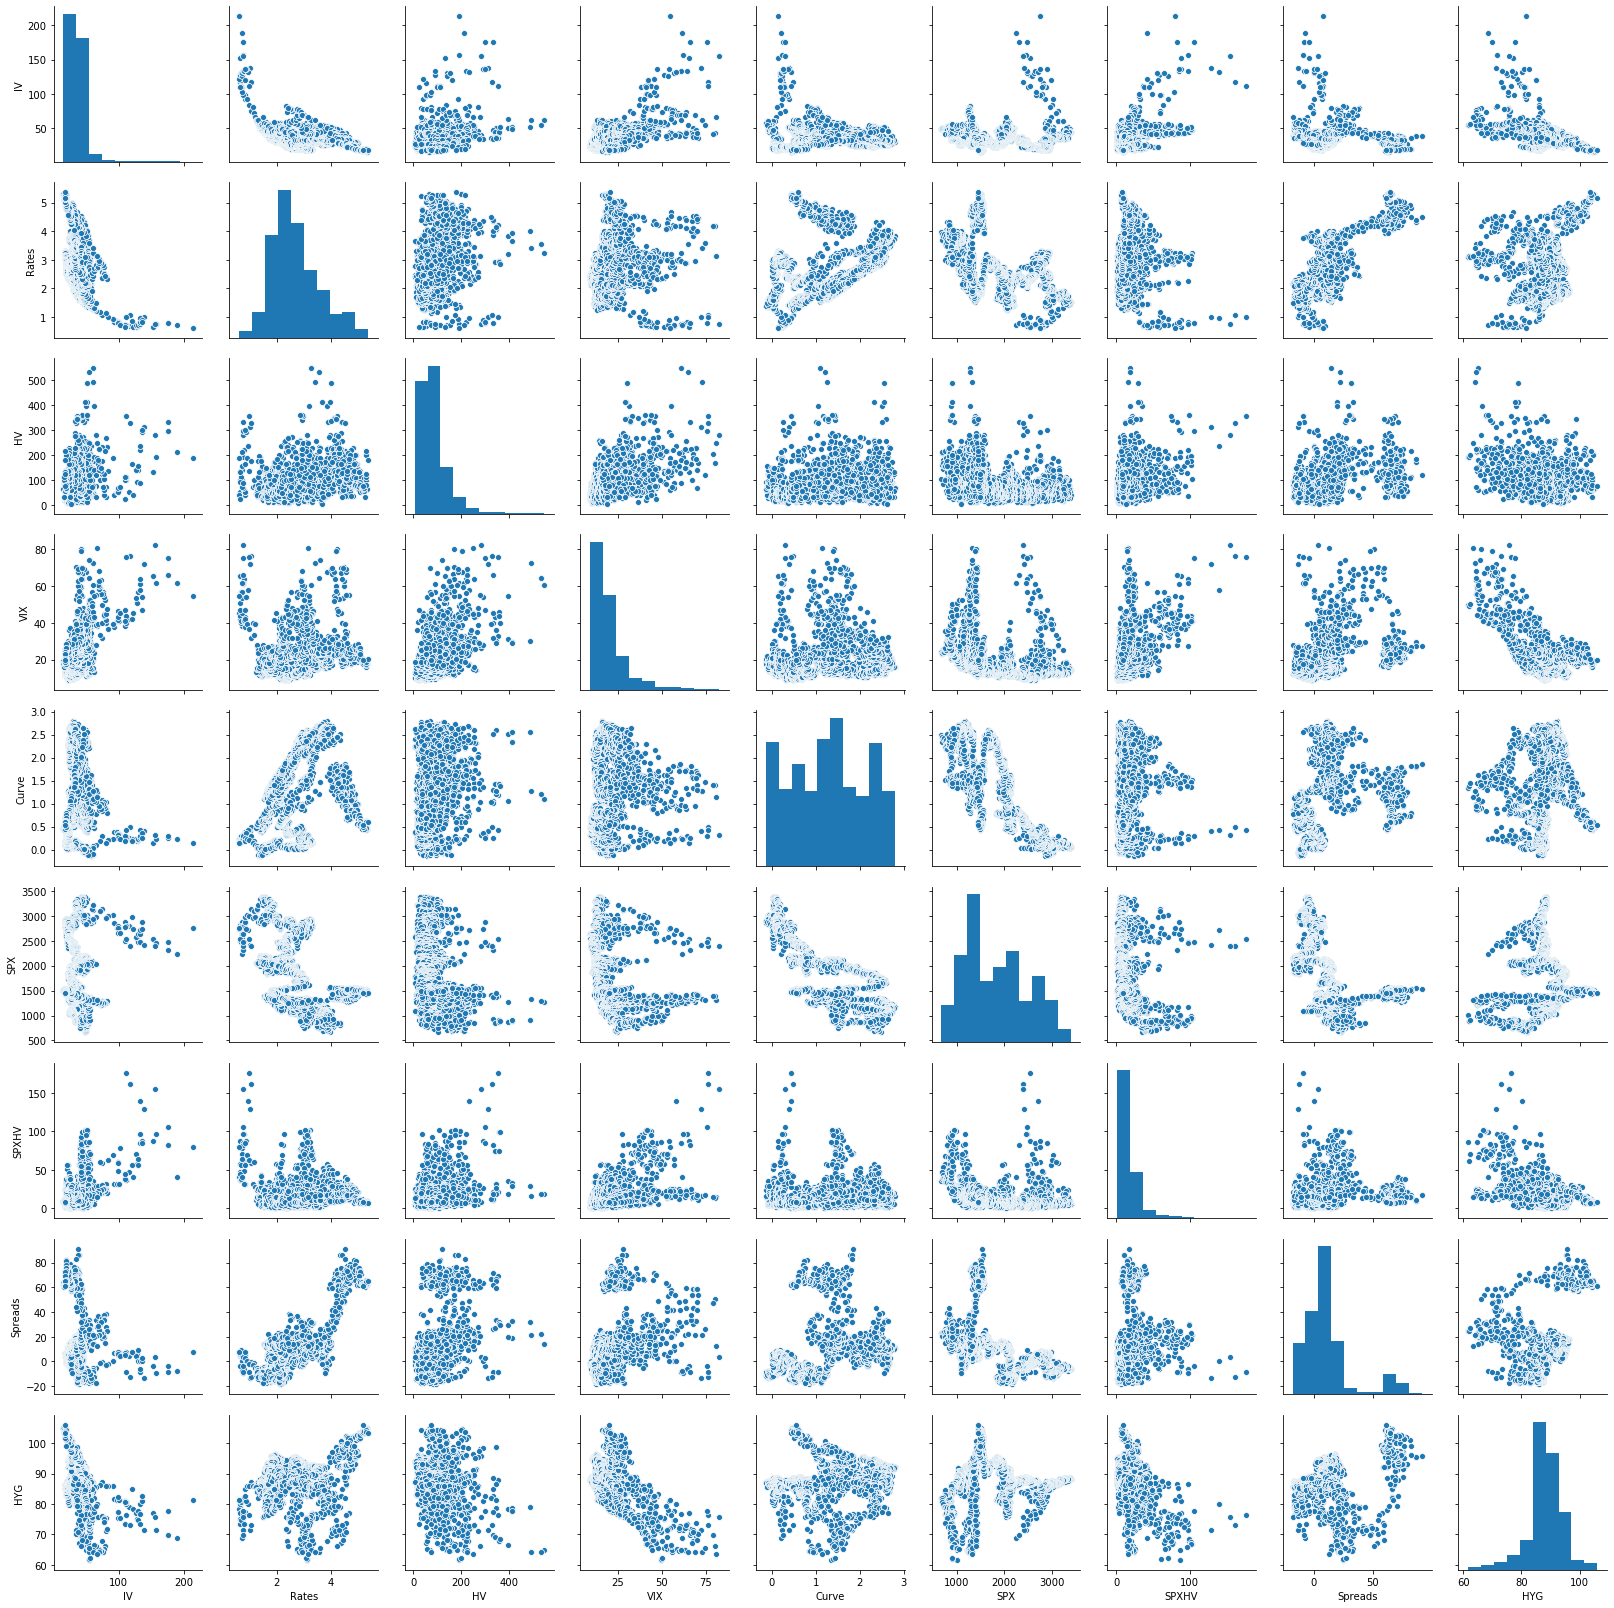

In [74]:
import seaborn as sns
sns.pairplot(df_merged)

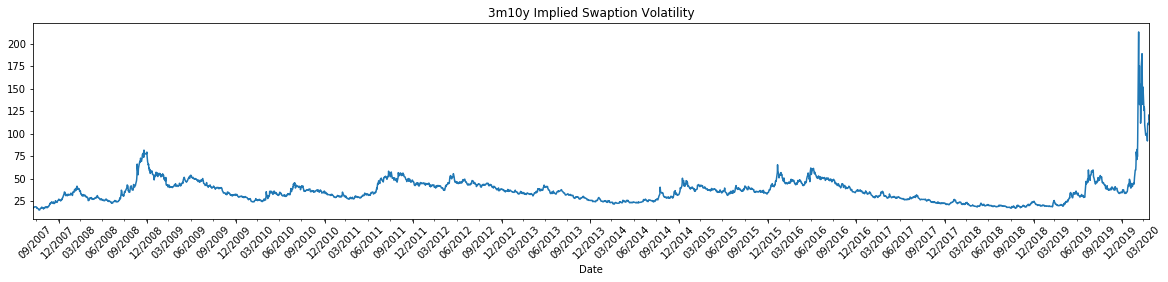

In [75]:
fig, ax = plt.subplots()
df_merged['IV'].plot(title='3m10y Implied Swaption Volatility', figsize=(20,4))

years = mdates.YearLocator()
months = plt.matplotlib.dates.MonthLocator((3,6,9,12), bymonthday=28)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter(''))
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m/%Y"))
ax.xaxis.set_tick_params(which='minor',rotation=45)

plt.show()

# Run Linear Regression

In [76]:
X = df_merged.drop(['IV'],axis=1)
y = df_merged['IV']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [78]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.index = X.index
X_scaled.head()

,Rates,HV,VIX,Curve,SPX,SPXHV,Spreads,HYG
Date,,,,,,,,
2020-04-22,-2.298017,-0.580399,2.229285,-1.281575,1.516978,2.047028,-0.334063,-1.468774
2020-04-21,-2.326663,-0.781349,2.574038,-1.319315,1.419152,1.682291,-0.206754,-1.582449
2020-04-20,-2.287446,0.272728,2.415230,-1.291745,1.554160,1.369635,-0.225505,-1.341920
2020-04-17,-2.241408,0.290996,1.844328,-1.235380,1.634291,1.520711,-0.200833,-1.140930
2020-04-16,-2.252889,0.480986,2.041329,-1.258906,1.517352,1.368564,-0.179121,-1.208475


In [79]:
np.set_printoptions(suppress=True)

In [80]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
lin_reg.intercept_

36.15296442576924

In [82]:
lin_reg.coef_

array([-11.59228463,   2.41461818,   7.21582929,   0.0085295 ,
        -1.85325872,   3.22043514,   1.55950416,   1.53392549])

In [83]:
from sklearn.metrics import mean_squared_error

linear_predictions = lin_reg.predict(X_scaled)
lin_mse = mean_squared_error(y, linear_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7.3333528327241755

In [84]:
linreg_r2 = lin_reg.score(X_scaled,y)
linreg_r2

0.7455557464716239

# Linear Regression without SPX

Just want to check this to see if SPX is important to the overall analysis

In [85]:
X1_scaled = X_scaled.drop(['SPX'],axis=1)
y1 = df_merged['IV']

X1_scaled.head()

,Rates,HV,VIX,Curve,SPXHV,Spreads,HYG
Date,,,,,,,
2020-04-22,-2.298017,-0.580399,2.229285,-1.281575,2.047028,-0.334063,-1.468774
2020-04-21,-2.326663,-0.781349,2.574038,-1.319315,1.682291,-0.206754,-1.582449
2020-04-20,-2.287446,0.272728,2.415230,-1.291745,1.369635,-0.225505,-1.341920
2020-04-17,-2.241408,0.290996,1.844328,-1.235380,1.520711,-0.200833,-1.140930
2020-04-16,-2.252889,0.480986,2.041329,-1.258906,1.368564,-0.179121,-1.208475


In [86]:
lin_reg_X1 = lin_reg.fit(X1_scaled, y1)
lin_reg_X1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
lin_reg_X1.intercept_

36.15296442576924

In [88]:
lin_reg_X1.coef_

array([-11.80855402,   2.37508988,   7.32803292,   1.4512785 ,
         3.42096702,   2.22488476,   1.33252413])

In [89]:
linear_predictions1 = lin_reg.predict(X1_scaled)
lin_mse1 = mean_squared_error(y1, linear_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

7.383692275914586

In [90]:
lin_reg_X1_r2 = lin_reg.score(X1_scaled,y1)
lin_reg_X1_r2

0.742050516522253

Linear Regression with SPX looks slightly better, so we'll use all columns for the remainder of this analysis

# Polynomial Regression

In [91]:
from sklearn.preprocessing import PolynomialFeatures

In [92]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_scaled)

In [93]:
X_poly.shape

(3143, 44)

In [94]:
poly_model = LinearRegression()
poly_model.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
poly_model.intercept_

34.39750724958839

In [96]:
poly_model.coef_

array([-10.54963397,   1.58245783,   2.04959588,  -0.11779974,
        -4.61605225,   1.00482468,   3.49206671,  -2.86306158,
         2.26684897,  -0.69237825,  -4.64597634,   1.46603326,
        -1.86027818,  -0.78498725,   2.15779516,   0.28968709,
        -0.0202573 ,   0.60630373,   0.02153068,  -0.00132025,
         0.15204063,  -0.23861895,   0.61362161,  -0.37788877,
        -3.8294344 ,  -1.11866091,   0.18117253,   3.54430796,
        -1.17099992,  -1.22202898,  -0.63735254,   0.56744182,
         5.22029   ,  -2.28095446,   0.24510899,   0.36447966,
         3.61987074,   0.52182957,  -0.46323286,   0.65149356,
         0.28993417,  -1.85828919,   0.99407322,  -0.63133824])

In [97]:
poly_predictions = poly_model.predict(X_poly)
poly_mse = mean_squared_error(y, poly_predictions)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

3.7130583844146337

In [98]:
poly_model_r2 = poly_model.score(X_poly,y)
poly_model_r2

0.9347694498165477

# Decision Tree Regression

In [99]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

In [100]:
tree_reg.fit(X_scaled, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [101]:
tree_predictions = tree_reg.predict(X_scaled)
tree_mse = mean_squared_error(y, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.147540381149052e-06

In [102]:
tree_reg_r2 = tree_reg.score(X_scaled, y)
tree_reg_r2

0.9999999999996859

In [103]:
tree_reg.feature_importances_

array([0.62483275, 0.0050668 , 0.04217087, 0.09718073, 0.05462349,
       0.00408525, 0.01565099, 0.15638911])

Check out some of the outputs from the Decision Tree Regressor

In [104]:
tree_reg.get_depth()

29

In [105]:
tree_reg.get_n_leaves()

3139

In [106]:
tree_reg.n_features_

8

In [107]:
tree_reg.n_outputs_

1

Fine Tune the Decision Tree Model

In [108]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [109]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [38.04953801  7.65994634  4.33905471  5.27359422  7.36702932  7.16622466
  8.13272406  4.72602447 10.49274026 15.79091448]
Mean: 10.899779052979241
Standard deviation: 9.584275986407537


These are MUCH higher than the tree_rmse and the r^2 above (which looks like an overfit).  Let's do GridSearchCV.

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
param_grid = [
    {'max_depth': [None, 3, 5, 10, 50], 'min_samples_leaf': [1, 3, 5, 10], 'min_samples_split':[2, 3, 5, 10]}
]

In [112]:
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [113]:
grid_search.fit(X_scaled, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [None, 3, 5, 10, 50],
                          'min_samples_leaf': [1, 3, 5, 10],
                          'min_samples_split': [2, 3, 5, 10]}],
             pre

In [114]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

In [115]:
grid_search.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [116]:
cvres = grid_search.cv_results_

In [117]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

11.327541921182847 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
11.682553972754631 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
11.320340327505072 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
11.565164052407916 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
11.646583905254772 {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
11.646583905254772 {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 3}
11.646583905254772 {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
11.614333623024766 {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10}
11.578524014604511 {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
11.578524014604511 {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 3}
11.578524014604511 {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 5}
11.578524014604511 {'max_depth': None, 'min_samples_

# Singular Value Decomposition

In [118]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_scaled, y, rcond=1e-6)
theta_best_svd

array([-11.59228463,   2.41461818,   7.21582929,   0.0085295 ,
        -1.85325872,   3.22043514,   1.55950416,   1.53392549])

In [119]:
svd_predictions = np.dot(X_scaled, pd.DataFrame(theta_best_svd))

In [120]:
SVD_mse = mean_squared_error(y, svd_predictions)
SVD_rmse = np.sqrt(SVD_mse)
SVD_rmse

36.88922472132154

# PCA

Try PCA using SVD - implementing it ourself using Numpy's SVD code - need to center the data around the origin

In [121]:
X_centered = X_scaled - X_scaled.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [122]:
c1, c2

(array([ 0.39437445,  0.36975849,  0.37548061,  0.34100012, -0.44779438,
         0.28087114,  0.41077759, -0.0483119 ]),
 array([ 0.27884843, -0.19925151, -0.4199805 ,  0.2704718 , -0.15196629,
        -0.39827929,  0.25095921,  0.62313971]))

In [123]:
W2 = Vt.T[:, :8]
X2D = X_centered.dot(W2)

In [124]:
X2D

,0,1,2,3,4,5,6,7
Date,,,,,,,,
2020-04-22,-0.891460,-3.852946,0.304172,-1.271781,-0.344877,1.563588,0.961744,-0.389614
2020-04-21,-0.861333,-3.854643,0.337596,-1.175958,0.106174,1.907173,0.946880,-0.372743
2020-04-20,-0.673935,-3.730396,0.632849,-0.245841,-0.410963,1.705746,0.965134,-0.332754
2020-04-17,-0.837191,-3.407096,0.625191,-0.375583,-0.763456,1.390823,0.877479,-0.483196
2020-04-16,-0.683708,-3.495527,0.651742,-0.136922,-0.682102,1.510640,0.821814,-0.417362
...,...,...,...,...,...,...,...,...
2007-09-25,2.690932,2.933297,3.348602,0.728049,-0.995439,-0.141677,-0.433030,0.971351
2007-09-24,2.694208,2.873562,3.330694,0.684635,-0.928554,-0.111994,-0.414716,1.001023
2007-09-21,2.773117,2.750288,3.332019,0.939139,-1.036352,-0.219247,-0.482913,0.966504


Now try PCA using Skikit-Learn's PCA function

In [125]:
from sklearn.decomposition import PCA

In [126]:
pca = PCA(n_components = 8)
X2D = pca.fit_transform(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
X2D

array([[-0.89145993,  3.85294552,  0.30417184, ..., -1.56358792,
         0.96174432, -0.3896142 ],
       [-0.86133288,  3.85464304,  0.3375959 , ..., -1.90717342,
         0.94687987, -0.37274342],
       [-0.67393459,  3.7303955 ,  0.63284913, ..., -1.70574642,
         0.96513369, -0.33275416],
       ...,
       [ 2.77311674, -2.75028827,  3.33201919, ...,  0.21924678,
        -0.48291294,  0.96650445],
       [ 2.64602078, -2.8130826 ,  3.25356453, ...,  0.10381263,
        -0.37020001,  0.99839488],
       [ 1.71756319, -3.31848176,  2.77791968, ..., -0.4365027 ,
        -0.17652592,  1.20701559]])

In [127]:
pca.components_

array([[ 0.39437445,  0.36975849,  0.37548061,  0.34100012, -0.44779438,
         0.28087114,  0.41077759, -0.0483119 ],
       [-0.27884843,  0.19925151,  0.4199805 , -0.2704718 ,  0.15196629,
         0.39827929, -0.25095921, -0.62313971],
       [ 0.34873303,  0.19988628,  0.09335825, -0.6150054 ,  0.45863356,
        -0.07094478,  0.47234544,  0.1139966 ],
       [-0.12794177,  0.7056735 ,  0.04989957,  0.12287131,  0.04176507,
        -0.65578538, -0.17491888, -0.07531995],
       [-0.37040999,  0.49760532, -0.32250048, -0.04761739,  0.04296418,
         0.52558729, -0.01403538,  0.48023588],
       [ 0.61388427,  0.18474497, -0.52360731,  0.13521991,  0.20318293,
         0.20463487, -0.34399485, -0.3083426 ],
       [ 0.0781238 , -0.05987922,  0.42185914,  0.5129304 ,  0.66046557,
         0.09598561, -0.14427851,  0.28810438],
       [ 0.32949618,  0.01790543,  0.33954183, -0.36549348, -0.29146764,
         0.00816851, -0.61255912,  0.42660138]])

In [128]:
pca.explained_variance_

array([3.18049407, 2.07054291, 1.09868705, 0.61120811, 0.49777287,
       0.32885016, 0.14183548, 0.07315552])

In [129]:
pca.explained_variance_ratio_

array([0.39743527, 0.25873552, 0.13729219, 0.07637671, 0.06220181,
       0.04109319, 0.01772379, 0.00914153])

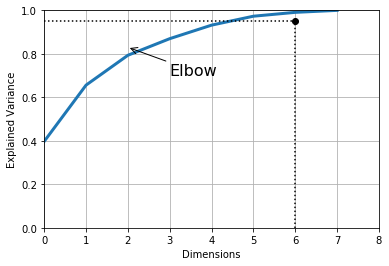

In [130]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(2, 0.83), xytext=(3, .7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

Perform PCA without reducing dimensionality, then compute the minimum number of dimensions required to preserve 95% of the training set's variance

In [131]:
pca = PCA()
pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1
d

6

Or, perform PCA by Pre-Specifying the ratio of variance you wish to preserve (between 0.0 and 1.0)

In [132]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_scaled)
X_reduced

array([[-0.89145993,  3.85294552,  0.30417184, -1.27178076,  0.34487725,
        -1.56358792],
       [-0.86133288,  3.85464304,  0.3375959 , -1.17595817, -0.10617398,
        -1.90717342],
       [-0.67393459,  3.7303955 ,  0.63284913, -0.24584135,  0.41096302,
        -1.70574642],
       ...,
       [ 2.77311674, -2.75028827,  3.33201919,  0.93913856,  1.03635247,
         0.21924678],
       [ 2.64602078, -2.8130826 ,  3.25356453,  0.4473839 ,  0.62432558,
         0.10381263],
       [ 1.71756319, -3.31848176,  2.77791968, -0.93707771,  0.01440804,
        -0.4365027 ]])

Let's try making predictions using the first 3 PCA variables

In [133]:
pca = PCA(n_components = 3)
X3D = pca.fit_transform(X_scaled)

In [134]:
pca_p = lin_reg.fit(X3D, y)
pca_p

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
pca_p.intercept_

36.15296442576925

In [136]:
pca_p.coef_

array([ 1.33434589,  6.39558526, -3.05850477])

In [137]:
pca_predictions = pca_p.predict(X3D)
pca_mse = mean_squared_error(y, pca_predictions)
pca_rmse = np.sqrt(pca_mse)
pca_rmse

10.523978372645608

In [138]:
pca_r2 = pca_p.score(X3D,y)
pca_r2

0.47598058364460155

# Batch Gradient Descent

In [139]:
X_b = np.c_[np.ones((X_scaled.shape[0],1)), X_scaled]

eta = .001
n_iterations = 10000
m = 100

theta = np.random.randn(9)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([ 36.15296443, -11.59228463,   2.41461818,   7.21582929,
         0.0085295 ,  -1.85325872,   3.22043514,   1.55950416,
         1.53392549])

In [140]:
BGD_predictions = np.dot(X_b, pd.DataFrame(theta))

In [141]:
BGD_mse = mean_squared_error(y, BGD_predictions)
BGD_rmse = np.sqrt(BGD_mse)
BGD_rmse

7.3333528327241755

In [142]:
from sklearn.metrics import r2_score

BGD_r2 = r2_score(y, BGD_predictions)
BGD_r2

0.7455557464716239

# Stochastic Gradient Descent

In [143]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_scaled, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [144]:
sgd_reg.n_iter_

24

In [145]:
sgd_reg.intercept_, sgd_reg.coef_

(array([36.70183563]),
 array([-11.98234348,   2.40294827,   6.96320944,  -0.37393351,
         -1.61147207,   4.47577873,   1.3136027 ,   0.9750516 ]))

In [146]:
sgd_predictions = sgd_reg.predict(X_scaled)

In [147]:
sgd_mse = mean_squared_error(y, sgd_predictions)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

7.557981193352385

In [148]:
sgd_r2 = sgd_reg.score(X_scaled, y)
sgd_r2

0.7297292174606294

# Mini-Batch Gradient Descent

Problem with the indices in "shuffled_indeces" is that they are numbers, but the index for "X_scaled" is date.  Need to fix this for MBGD to work.

In [149]:
X_b = pd.DataFrame(np.c_[np.ones((X_scaled.shape[0],1)), X_scaled])
X_b.head()

,0,1,2,3,4,5,6,7,8
0,1.0,-2.298017,-0.580399,2.229285,-1.281575,1.516978,2.047028,-0.334063,-1.468774
1,1.0,-2.326663,-0.781349,2.574038,-1.319315,1.419152,1.682291,-0.206754,-1.582449
2,1.0,-2.287446,0.272728,2.415230,-1.291745,1.554160,1.369635,-0.225505,-1.341920
3,1.0,-2.241408,0.290996,1.844328,-1.235380,1.634291,1.520711,-0.200833,-1.140930
4,1.0,-2.252889,0.480986,2.041329,-1.258906,1.517352,1.368564,-0.179121,-1.208475


In [150]:
X_mgd = X_b.copy(deep=True)
X_mgd.reset_index(drop=True, inplace=True)
y_mgd = y.copy(deep=True)
y_mgd.reset_index(drop=True, inplace=True)

In [151]:
theta_path_mgd = []

n_iterations = 500
minibatch_size = 200
m_mgd = X_scaled.shape[0]

np.random.seed(42)
theta_mgd = np.random.randn(X_b.shape[1])  # random initialization

t0, t1 = 100, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m_mgd)
    X_scaled_shuffled = X_mgd.iloc[shuffled_indices]
    y_shuffled = y_mgd.iloc[shuffled_indices]
    for i in range(0, m_mgd, minibatch_size):
        t += 1
        xi = X_scaled_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients_mgd = 2/minibatch_size * xi.T.dot(xi.dot(theta_mgd) - yi)
        eta_mgd = learning_schedule(t)
        theta_mgd = theta_mgd - eta_mgd * gradients_mgd
        theta_path_mgd.append(theta_mgd)

In [152]:
MBGD_predictions = np.dot(X_mgd, theta_mgd)

In [153]:
MBGD_mse = mean_squared_error(y_mgd, MBGD_predictions)
MBGD_rmse = np.sqrt(MBGD_mse)
MBGD_rmse

7.3335563832539945

In [154]:
MBGD_r2 = r2_score(y, MBGD_predictions)
MBGD_r2

0.7455416211506171

# Regularized Models

#### Ridge

In [155]:
from sklearn.linear_model import Ridge

In [156]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_scaled, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='cholesky', tol=0.001)

In [157]:
ridge_reg.intercept_

36.15296442576924

In [158]:
ridge_reg.coef_

array([-11.58246535,   2.41469904,   7.21123576,   0.00659366,
        -1.85418469,   3.22039807,   1.5541325 ,   1.53079286])

In [159]:
ridge_predictions = ridge_reg.predict(X_scaled)
ridge_mse = mean_squared_error(y, ridge_predictions)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

7.333356265018772

In [160]:
ridge_r2 = ridge_reg.score(X_scaled, y)
ridge_r2

0.745555508291937

#### Lasso

In [161]:
from sklearn.linear_model import Lasso

In [162]:
lasso_reg = Lasso(alpha=1, tol=.01)
lasso_reg.fit(X_scaled, y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.01, warm_start=False)

In [163]:
coeffs = lasso_reg.coef_
len(coeffs)

8

In [164]:
np.count_nonzero(coeffs)

5

In [165]:
lasso_reg.intercept_

36.15296442576925

In [166]:
lasso_reg.coef_

array([-8.13045146,  1.62493603,  6.16466211,  0.        , -0.95843413,
        2.6016779 ,  0.        ,  0.        ])

In [167]:
lasso_predictions = lasso_reg.predict(X_scaled)
lasso_mse = mean_squared_error(y, lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

7.874309007926297

In [168]:
lasso_r2 = lasso_reg.score(X_scaled, y)
lasso_r2

0.7066322348317533

#### ElasticNet

In [169]:
from sklearn.linear_model import ElasticNet

In [170]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_scaled, y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=42, selection='cyclic', tol=0.0001, warm_start=False)

In [171]:
elastic_net.intercept_

36.15296442576924

In [172]:
elastic_net.coef_

array([-10.15633378,   2.359649  ,   6.46388226,  -0.        ,
        -1.72195972,   3.17007854,   0.92943328,   0.88254575])

In [173]:
elasticnet_predictions = elastic_net.predict(X_scaled)
elasticnet_mse = mean_squared_error(y, elasticnet_predictions)
elasticnet_rmse = np.sqrt(elasticnet_mse)
elasticnet_rmse

7.417504862517678

In [174]:
elasticnet_r2 = elastic_net.score(X_scaled, y)
elasticnet_r2

0.7396826199812225

# Support Vector Machine Regression

#### Linear SVR

In [175]:
from sklearn.svm import LinearSVR

In [176]:
svm_reg = LinearSVR(epsilon=.0003, fit_intercept=True, tol=1e-5, random_state=42, max_iter=10000)
svm_reg.fit(X_scaled, y)

LinearSVR(C=1.0, dual=True, epsilon=0.0003, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=1e-05, verbose=0)

In [177]:
param_grid = [
    {'epsilon': [0.000001, 0.00001, 0.0003, 0.003, 0.1, 3, 5, 10, 100, 1000, 2000]}
]
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_scaled,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0003,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=10000,
                                 random_state=42, tol=1e-05, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'epsilon': [1e-06, 1e-05, 0.0003, 0.003, 0.1, 3, 5,
                                      10, 100, 1000, 2000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [178]:
grid_search.best_params_

{'epsilon': 0.0003}

In [179]:
svm_reg.intercept_

array([34.85806222])

In [180]:
svm_reg.coef_

array([-9.74905013,  2.59650794,  2.94268767, -0.66437304, -4.87147878,
        0.90013584,  2.5189932 , -1.57303854])

In [181]:
svm_predictions = svm_reg.predict(X_scaled)
svm_mse = mean_squared_error(y, svm_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

8.478202650443611

In [182]:
svm_r2 = svm_reg.score(X_scaled, y)
svm_r2

0.6599090530133179

#### Non-Linear SVR

In [183]:
from sklearn.svm import SVR

In [184]:
svm_poly_reg = SVR(kernel="poly", degree=3, C=10, epsilon=3, gamma="auto")
svm_poly_reg.fit(X_scaled, y)

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=3, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [185]:
svm_poly_reg2 = SVR(kernel="poly")

Cs = [.001, .01, .1, 1, 10]

param_grid = [
    {'epsilon': [0.1, 3, 5, 10],
    'C': Cs
    }
]
grid_search = GridSearchCV(svm_poly_reg2, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_scaled, y)
grid_search.best_params_

{'C': 0.01, 'epsilon': 0.1}

In [186]:
cvres_svm_poly = grid_search.cv_results_

In [187]:
for mean_score, params in zip(cvres_svm_poly["mean_test_score"], cvres_svm_poly["params"]):
    print(np.sqrt(-mean_score), params)

0.40851762323513724 {'C': 0.001, 'epsilon': 0.1}
0.4504502609658843 {'C': 0.001, 'epsilon': 3}
0.4515602621851683 {'C': 0.001, 'epsilon': 5}
0.4264965600743485 {'C': 0.001, 'epsilon': 10}
0.2535113780072041 {'C': 0.01, 'epsilon': 0.1}
0.3114908381144505 {'C': 0.01, 'epsilon': 3}
0.3120022464037622 {'C': 0.01, 'epsilon': 5}
0.2870354590739501 {'C': 0.01, 'epsilon': 10}
1.0310948442938583 {'C': 0.1, 'epsilon': 0.1}
0.9442550312087312 {'C': 0.1, 'epsilon': 3}
0.7686191151777604 {'C': 0.1, 'epsilon': 5}
0.3918339904121404 {'C': 0.1, 'epsilon': 10}
2.466073918733947 {'C': 1, 'epsilon': 0.1}
1.7906364903161296 {'C': 1, 'epsilon': 3}
1.2522024053378256 {'C': 1, 'epsilon': 5}
0.5932922463907472 {'C': 1, 'epsilon': 10}
2.3048691407537807 {'C': 10, 'epsilon': 0.1}
1.887669109273336 {'C': 10, 'epsilon': 3}
1.4880314917482165 {'C': 10, 'epsilon': 5}
0.7878500135825194 {'C': 10, 'epsilon': 10}


In [188]:
svm_poly_reg.intercept_

array([36.66426274])

In [189]:
svm_poly_reg.dual_coef_

array([[10.        , 10.        , 10.        , ...,  5.97524431,
        10.        , 10.        ]])

In [190]:
svm_poly_reg.dual_coef_.shape

(1, 1493)

In [191]:
svm_poly_reg.support_vectors_

array([[-2.29801748, -0.58039886,  2.229285  , ...,  2.04702838,
        -0.33406289, -1.46877423],
       [-2.32666339, -0.78134945,  2.57403772, ...,  1.68229065,
        -0.20675426, -1.58244899],
       [-2.24140771,  0.29099599,  1.84432788, ...,  1.52071107,
        -0.20083293, -1.14092961],
       ...,
       [ 2.93383947,  2.40855586, -0.08045773, ..., -0.61765565,
         2.62660288,  2.59221563],
       [ 3.0378514 ,  1.75381814,  0.06528322, ..., -0.57941009,
         2.64880788,  2.54938166],
       [ 2.80197735, -0.17342159,  0.0230686 , ..., -0.51066108,
         2.45044327,  2.97772136]])

Note that the GridSearchCV results given result in a much lower number of dual_coefficients (77) than when C=10 and epsilon=.1, but a much higher rmse and r2

In [192]:
svm_poly_predictions = svm_poly_reg.predict(X_scaled)
svm_poly_mse = mean_squared_error(y, svm_poly_predictions)
svm_poly_rmse = np.sqrt(svm_poly_mse)
svm_poly_rmse

4.377129353769076

In [193]:
svm_poly_r2 = svm_poly_reg.score(X_scaled, y)
svm_poly_r2

0.9093503257980056

# Random Forest Regression

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
forest_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
forest_reg.fit(X_scaled, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [196]:
forest_reg.feature_importances_

array([0.62590741, 0.00802946, 0.03992205, 0.09860914, 0.04826433,
       0.00778739, 0.02256577, 0.14891446])

In [197]:
forest_predictions = forest_reg.predict(X_scaled)
forest_mse = mean_squared_error(y, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.9572295742530228

In [198]:
forest_r2 = forest_reg.score(X_scaled, y)
forest_r2

0.995664694555231

# Voting Regression

In [199]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[('rf', forest_reg),('svm', svm_reg),('lr', lin_reg)])
voting_reg.fit(X_scaled, y)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=500, n_jobs=-1,
                          

In [200]:
voting_predictions = voting_reg.predict(X_scaled)
voting_mse = mean_squared_error(y, voting_predictions)
voting_rmse = np.sqrt(voting_mse)
voting_rmse

5.219274188125543

In [201]:
voting_r2 = voting_reg.score(X_scaled, y)
voting_r2

0.8711134168680394

In [202]:
from sklearn.metrics import accuracy_score

for clf in (forest_reg, lin_reg, svm_reg, voting_reg):
    clf.fit(X_scaled, y)
    y_pred = clf.predict(X_scaled)
    print(clf.__class__.__name__, clf.score(X_scaled, y))

RandomForestRegressor 0.995664694555231
LinearRegression 0.7455557464716239
LinearSVR 0.6599090530133179
VotingRegressor 0.8711134168680394


# Bagging Regression and Pasting Regression

#### Bagging

In [203]:
from sklearn.ensemble import BaggingRegressor

In [204]:
bag_reg = BaggingRegressor(
    LinearRegression(), n_estimators=150, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_reg.fit(X_scaled, y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=True, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=150, n_jobs=-1, oob_score=False,
                 random_state=42, verbose=0, warm_start=False)

In [205]:
bag_predictions = bag_reg.predict(X_scaled)
bag_mse = mean_squared_error(y, bag_predictions)
bag_rmse = np.sqrt(bag_mse)
bag_rmse

7.41292544888616

In [206]:
bag_r2 = bag_reg.score(X_scaled, y)
bag_r2

0.7400039498600609

#### Pasting

In [207]:
paste_reg = BaggingRegressor(
    LinearRegression(), n_estimators=150, max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)
paste_reg.fit(X_scaled, y)

BaggingRegressor(base_estimator=LinearRegression(copy_X=True,
                                                 fit_intercept=True,
                                                 n_jobs=None, normalize=False),
                 bootstrap=False, bootstrap_features=False, max_features=1.0,
                 max_samples=100, n_estimators=150, n_jobs=-1, oob_score=False,
                 random_state=42, verbose=0, warm_start=False)

In [208]:
paste_predictions = paste_reg.predict(X_scaled)
paste_mse = mean_squared_error(y, paste_predictions)
paste_rmse = np.sqrt(paste_mse)
paste_rmse

7.386225815724947

In [209]:
paste_r2 = paste_reg.score(X_scaled, y)
paste_r2

0.7418734675928231

# AdaBoost

In [210]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(
    LinearRegression(), n_estimators=200, learning_rate=.001, random_state=42)
ada_reg.fit(X_scaled, y)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=0.001, loss='linear', n_estimators=200,
                  random_state=42)

In [211]:
ada_reg.estimator_weights_.shape

(200,)

In [212]:
ada_reg.estimator_weights_

array([0.00305764, 0.00304416, 0.00304793, 0.0030608 , 0.00307338,
       0.00303918, 0.00308769, 0.00301925, 0.00307064, 0.00307224,
       0.00300129, 0.00309895, 0.00303843, 0.00306304, 0.00306868,
       0.00300215, 0.00306135, 0.00302918, 0.00306987, 0.00303987,
       0.00308932, 0.00303212, 0.00300408, 0.0030846 , 0.00307568,
       0.00304045, 0.00294387, 0.00297421, 0.00303634, 0.00308314,
       0.00301932, 0.00297653, 0.0029663 , 0.00299784, 0.00300047,
       0.0029666 , 0.0030229 , 0.00294011, 0.00300621, 0.00296536,
       0.00296233, 0.00296498, 0.00306979, 0.00304224, 0.0029486 ,
       0.00304625, 0.00310159, 0.00309918, 0.00306568, 0.00307676,
       0.00301753, 0.00310821, 0.00304973, 0.00300176, 0.00297706,
       0.00297501, 0.00306029, 0.00295859, 0.00297574, 0.0030747 ,
       0.00287008, 0.00314578, 0.0031092 , 0.00303386, 0.00301571,
       0.00297571, 0.00297704, 0.00295494, 0.00309161, 0.00304495,
       0.00304854, 0.0029799 , 0.00305387, 0.00303794, 0.00298

In [213]:
ada_predictions = ada_reg.predict(X_scaled)
ada_mse = mean_squared_error(y, ada_predictions)
ada_rmse = np.sqrt(ada_mse)
ada_rmse

7.326804770973944

In [214]:
ada_r2 = ada_reg.score(X_scaled, y)
ada_r2

0.7460099378549323

# Gradient Boosting Regression

In [215]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)
gbrt.fit(X_scaled, y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [216]:
gbrt.feature_importances_

array([0.71508024, 0.        , 0.16121851, 0.01041802, 0.08915445,
       0.        , 0.        , 0.02412878])

In [217]:
gbrt_predictions = gbrt.predict(X_scaled)
gbrt_mse = mean_squared_error(y, gbrt_predictions)
gbrt_rmse = np.sqrt(gbrt_mse)
gbrt_rmse

6.075671846794008

In [218]:
gbrt_r2 = gbrt.score(X_scaled, y)
gbrt_r2

0.825346978424423

# K-Means Clustering

Just trying K-means clustering on the data to see what the output looks like

In [219]:
from sklearn.cluster import KMeans

In [220]:
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(df_merged)

In [221]:
y_pred

array([2, 6, 2, ..., 5, 8, 8])

In [222]:
y_pred is kmeans.labels_

True

In [223]:
kmeans.cluster_centers_

array([[  35.80558942,    3.11357868,   97.35074156,   22.82627451,
           2.20033897, 1129.59355392,   20.54302759,    8.64188725,
          87.85122843],
       [  35.4658134 ,    2.21338899,   65.66524897,   14.63353211,
           0.61449358, 2395.62389908,   12.96540731,   -3.87701835,
          86.98703394],
       [  33.84908077,    2.24638683,   66.08260966,   16.66962963,
           0.0967    , 2902.76547325,   11.91011727,   -2.34374486,
          86.17748971],
       [  29.7723746 ,    2.48706285,   58.76283054,   14.49274306,
           1.80868924, 1878.73371528,   12.78285714,    6.48100694,
          91.04242674],
       [  42.91391   ,    3.54452857,  131.53594948,   28.98837438,
           2.15767488,  878.82231527,   42.35766256,   19.24763547,
          79.83266897],
       [  41.25887502,    2.74676299,   98.16067435,   25.91436333,
           1.53808302, 1339.96337861,   15.51181328,   23.68078098,
          88.44129423],
       [  26.48004103,    2.67983934,   

In [224]:
k_pred = pd.DataFrame(data=y_pred, index=df_merged.index, columns=['Cluster'])

In [238]:
k_pred

,Cluster
Date,
2020-04-22,2
2020-04-21,6
2020-04-20,2
2020-04-17,2
2020-04-16,2
...,...
2007-09-25,8
2007-09-24,8
2007-09-21,5


In [225]:
X['Rates']

Date
2020-04-22    0.6630
2020-04-21    0.6378
2020-04-20    0.6723
2020-04-17    0.7128
2020-04-16    0.7027
               ...  
2007-09-25    5.2870
2007-09-24    5.2885
2007-09-21    5.2655
2007-09-20    5.3570
2007-09-19    5.1495
Name: Rates, Length: 3143, dtype: float64

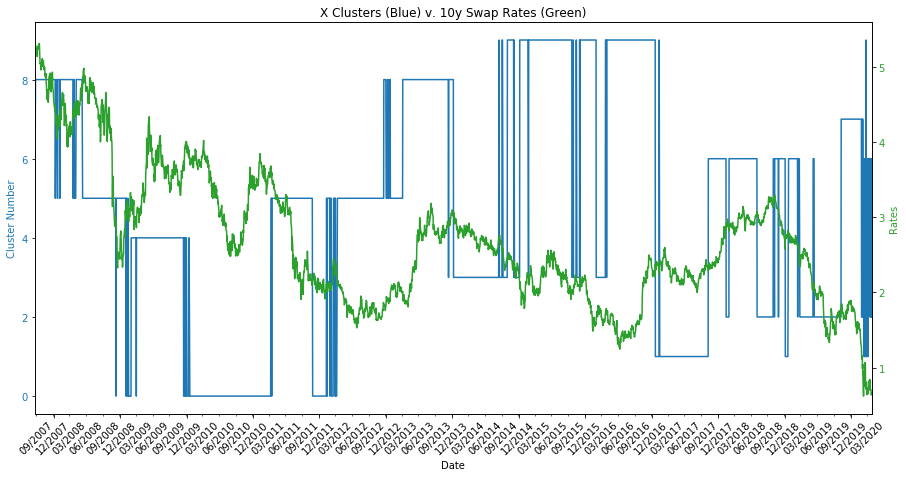

In [226]:
fig, ax = plt.subplots()
k_pred['Cluster'].plot(title='X Clusters (Blue) v. 10y Swap Rates (Green)', figsize=(15,8))

years = mdates.YearLocator()
months = plt.matplotlib.dates.MonthLocator((3,6,9,12), bymonthday=28)


color1 = 'tab:blue'
ax.set_ylabel('Cluster Number', color=color1)
ax.tick_params(axis='y', labelcolor=color1)

ax2 = ax.twinx()
color2 = 'tab:green'
ax2.set_ylabel('Rates', color=color2)
ax2.plot(X['Rates'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter(''))
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m/%Y"))
ax.xaxis.set_tick_params(which='minor',rotation=45)

plt.show()

# Time Series

#### Check for stationarity

In [227]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df_merged['IV'])

(-11.68979648353002,
 1.6632867309820625e-21,
 29,
 3113,
 {'1%': -3.432452377264027,
  '5%': -2.862468899529252,
  '10%': -2.5672644755364615},
 13637.006467251302)

#### Check for Seasonality

In [228]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [229]:
seasonal_dec_additive = seasonal_decompose(df_merged['IV'],period=250,model='additive')

In [230]:
df_merged.index

DatetimeIndex(['2020-04-22', '2020-04-21', '2020-04-20', '2020-04-17',
               '2020-04-16', '2020-04-15', '2020-04-14', '2020-04-13',
               '2020-04-10', '2020-04-09',
               ...
               '2007-10-03', '2007-10-02', '2007-10-01', '2007-09-28',
               '2007-09-26', '2007-09-25', '2007-09-24', '2007-09-21',
               '2007-09-20', '2007-09-19'],
              dtype='datetime64[ns]', name='Date', length=3143, freq=None)

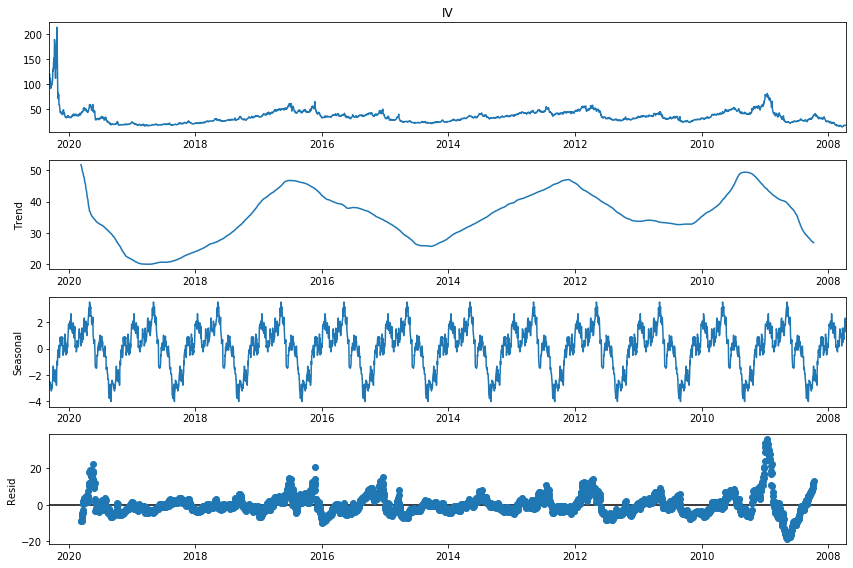

In [231]:
plt.rcParams.update({'figure.figsize':(12,8)})
seasonal_dec_additive.plot()

years = mdates.YearLocator()
months = plt.matplotlib.dates.MonthLocator((3,6,9,12), bymonthday=28)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter(''))
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%m/%Y"))
ax.xaxis.set_tick_params(which='minor',rotation=45)


plt.show()

In [232]:
seasonal_dec_additive.resid.mean()

-0.03786101316888608

In [233]:
seasonal_dec_additive.resid.std()

5.427923058262277

#### Check for Autocorrelation

In [234]:
import statsmodels.graphics.tsaplots as sgt

Text(0.5, 1.0, 'ACF for IV')

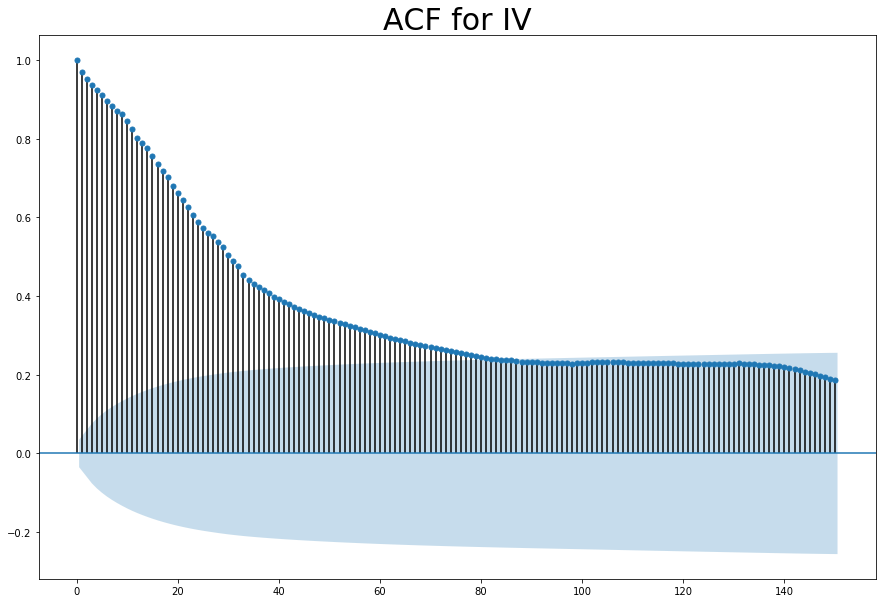

In [235]:
plt.rcParams.update({'figure.figsize':(15,10)})
sgt.plot_acf(df_merged['IV'],zero=True,lags=150)
plt.title('ACF for IV',size=30)


#### Check for Partial Autocorrelation

In [236]:
import statsmodels.graphics.tsaplots as sgt

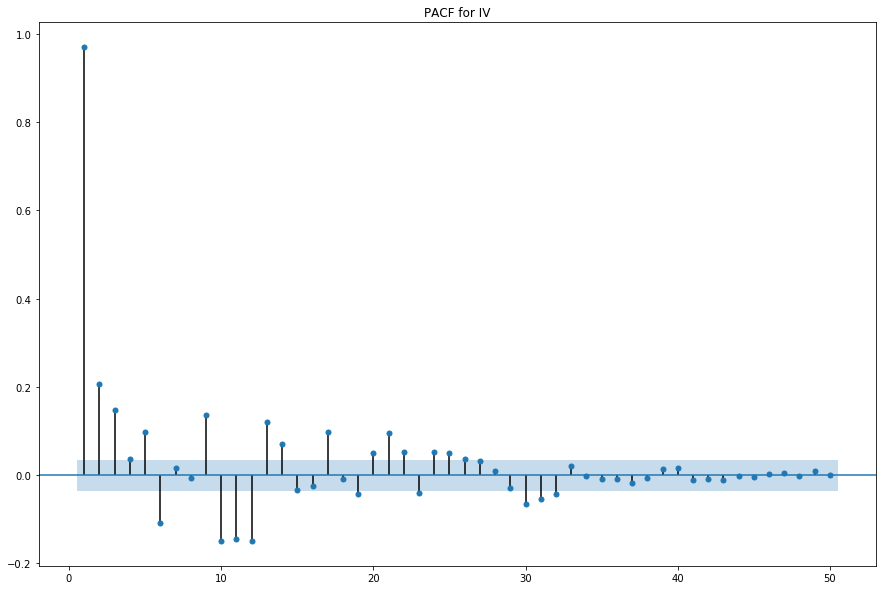

In [237]:
sgt.plot_pacf(df_merged['IV'],lags=50, alpha=0.05,zero=False,method=('ols'))
plt.title('PACF for IV')
plt.show()